<a href="https://colab.research.google.com/github/josedanielisidororeyes/Anal-tica-Descriptiva-y-Predictiva/blob/main/Pr%C3%A1cticaRegresionDatosCategoricos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Regresión lineal con datos categóricos: Costos, Localidades y Salarios**

📌 Objetivos de la Práctica:
Al finalizar esta práctica, los estudiantes serán capaces de:

- Codificar variables categóricas usando one-hot encoding con K-1 para problemas de regresión
- Realizar AED
- Construir un modelo de regresión con variables dummy
- Interpretar los resultados de los coeficientes
- Analizar los resultados de los errores residuales
- Calcular el desempeño del modelo de regresión.

Problema: Se podría argumentar que el salario está relacionado con el costo de la educación. Por lo tanto, para analizar este argumentos veremos qué sucede cuando usamos las variables independientes cost y location.

#Practicas 25: Regresíon con Datos Categoricos.

#Nombre: Jose Daniel Isidoro Reyes

#Matrícula:261552

# Fecha: 24/10/2025

# 1. Carga de datos

*  Carga el conjunto de datos college.csv, que está en campus virtual, en un dataframe. Elige de este conjunto las columnas salary (variable dependiente), cost(variable independiente - numérica) y location (variable independiente categórica).




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Carga de dataframe
df = pd.read_csv('/content/drive/MyDrive/Programación Analítica Predictiva/college.csv')

# Selección de variables independientes
X =  df[['cost', 'location']]

# Selección de variable dependiente
y =  df[['salary']]

*   Convierte si es necesario la variable location a tipo de dato categórico

In [ ]:
# Codficación One-Hot Encoding (K-1) de la variable location
X['location'] = X['location'].astype('category')


# Impresión de primeras filas de las variables dependientes
X.head(3)

/tmp/ipython-input-3098567659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['location'] = X['location'].astype('category')


,cost,location
0,189300,NE
1,189600,NE
2,188400,NE


*   Usa la instrucción describe() en las variables salary y cost

In [ ]:
df[['salary', 'cost']].describe()

,salary,cost
count,85.000000,85.000000
mean,95898.823529,142434.470588
std,11937.121912,53913.064578
min,74900.000000,18260.000000
25%,87100.000000,84670.000000
50%,93200.000000,169200.000000
75%,105000.000000,188700.000000
max,123000.000000,227300.000000


* Cuenta la cantidad de datos que hay por categoría en location

In [ ]:
df[['location']].value_counts()

,count
location,
NE,25
W,21
S,20
MW,19



* Convierte la variable location usando one-hot encoding


In [ ]:
X =  pd.get_dummies(X,
                    columns  =  ['location'],
                    drop_first =  True).astype(int)

# Impresión de primeras filas variables codificada
X.head(3)

,cost,location_NE,location_S,location_W
0,189300,1,0,0
1,189600,1,0,0
2,188400,1,0,0


# 2. Análisis Exploratorio de los Datos

*   Crea un histograma de la columna salary. Discute lo que observas





Text(0, 0.5, 'Frencuencia')

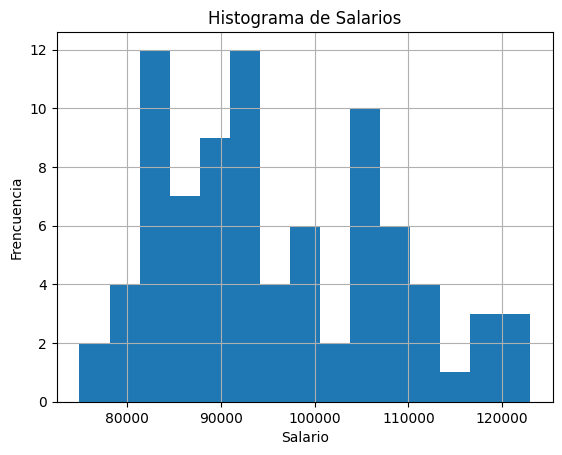

In [ ]:
import matplotlib.pyplot as plt
y.hist(bins  = 15)
plt.title('Histograma de Salarios')
plt.xlabel('Salario')
plt.ylabel('Frencuencia')

Se observa  que la variable Salario presenta un sesgo postivo, la mayoría de observaciones se concentran entre 85 mil y 105 mil.

* Crea un diagrama de dispersión de salary vs cost, considerando lo siguiente: para cada punto elegirás un color que represente la localidad en la que está el salario y el costo de la educación. Por lo tanto el diagrama de dispersión debería tener puntos en 4 colores distintos. Discute lo que observas

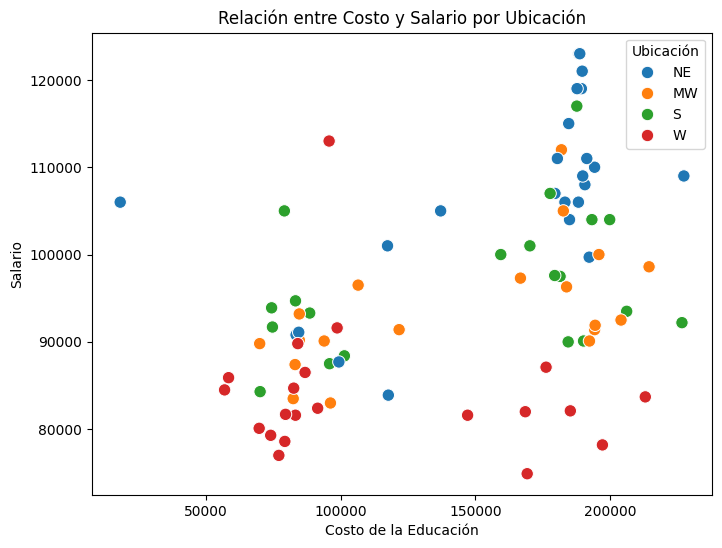

In [ ]:
import seaborn as sns

plt.figure(figsize =  (8, 6))
sns.scatterplot(
    data =  df,
    x  = 'cost',
    y  = 'salary',
    hue  = 'location',
    s =  80
)
plt.title('Relación entre Costo y Salario por Ubicación')
plt.xlabel('Costo de la Educación')
plt.ylabel('Salario')

plt.legend(title  = 'Ubicación')

Se observa una relación positiva entre el costo de la educación y el salario, lo cual hace perfecto sentido, ya que uno esperaría ver retornos de la inversion de la educación. No obstante, se observa que hay diferencia claras de salario por regiones,  la región W se asocia con salarios más bajos y la región NE con salarios más altos.


* Emplea un boxplot para saber si hay diferencias en los costos según la ubicación, es decir, con boxplot deberás analizar la distribución de cost por localidad. Discute lo que observas

Text(0.5, 0, 'Ubicación')

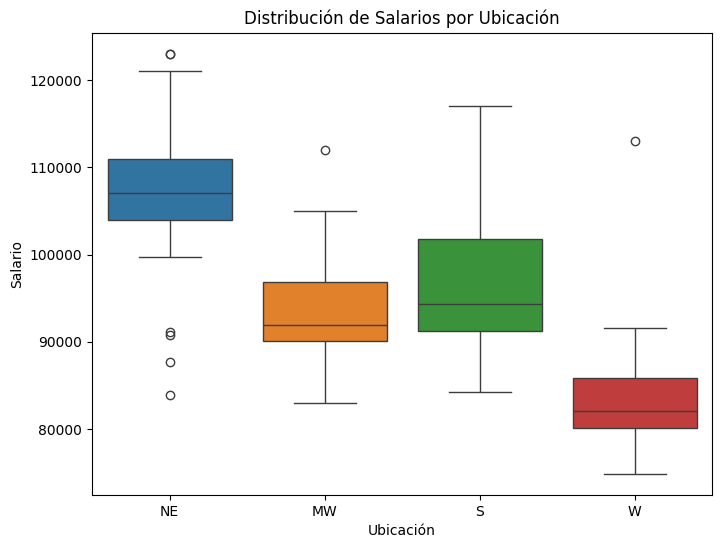

In [ ]:
plt.figure(figsize =  (8, 6))
sns.boxplot(
    data =  df,
    x =  'location',
    y  = 'salary',
    hue = 'location'
)
plt.title('Distribución de Salarios por Ubicación')
plt.ylabel('Salario')
plt.xlabel('Ubicación')

Se observan diferencias significativas en las regiones NE (salario más alto en comparación con las demás regiones) y W (salario más bajo en comparación con las demás regiones). No se observan diferencias significativas entre las regiones MW y S.

# 3. Construcción del modelo de regresión


- Construye el modelo de regresión usando los datos de salario, costo y location. Recuerda que esta última debe ser en su versión codificada con one-hot encoding.


In [ ]:
pd.options.display.float_format = '{:.4f}'.format
import statsmodels.api as sm

X_con_intercepto =  sm.add_constant(X)

modelo  =  sm.OLS(y, X_con_intercepto)

resultados  =  modelo.fit()

- Imprime los coeficientes e interpreta qué significan cuando se sustituyen valores en costo, y location (versión codificada). Si no recuerdas cómo se hace esta interpretación consulta los videos.


In [ ]:
print("---Impresión de Resultados ---")
print(resultados.summary())

---Impresión de Resultados ---
                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.571
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     26.57
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           4.96e-14
Time:                        22:41:29   Log-Likelihood:                -882.12
No. Observations:                  85   AIC:                             1774.
Df Residuals:                      80   BIC:                             1786.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        8.499e

Todos los coeficientes son estadísticamente significativos con excepción de location_S.  Se observa un salario de 84990 dolares cuando el costo de la educación es 0 y cuando la región es MW. Por otra parte, se observa que por cada dolar adicional invertido en la educaicón se espera un incremento de 0.0605 dolares  en el salario promedio manteniendo todo lo demás constante. Finalmente, se observa un salario 12030 más alto en la región NW, y 7721 más bajo en comparacíon con la categoría de referencia MW. El hecho de que el coeficientes de la región S no sea estadísticamente significativo sugiere que no  hay diferencias salariales respecto a la región MW.

# 4. Análisis de Residuos



- Construyen una visualización de predicciones (salario estimado) vs valores reales (salario real).


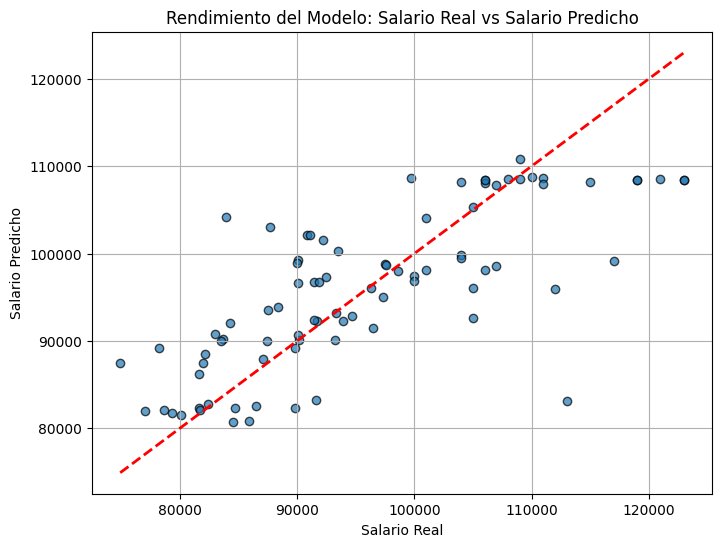

In [ ]:
y_real  =  y.squeeze()
y_pred  =  resultados.fittedvalues
plt.figure(figsize =  (8, 6))
plt.scatter(y_real, y_pred, alpha  =  0.7, edgecolor  = 'k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color  = 'red', linestyle = '--', lw =  2)
plt.xlabel('Salario Real')
plt.ylabel('Salario Predicho')
plt.title('Rendimiento del Modelo: Salario Real vs Salario Predicho')
plt.grid(True)
plt.show()

- Crea una gráfica de los errores residuales. Discute lo que observas

Text(0, 0.5, 'Residuales (Salario Real - Salario Predicho)')

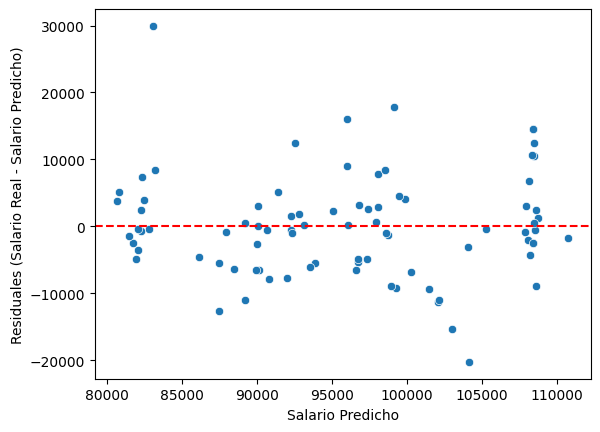

In [ ]:
#   Obtención de Residuales
residuales  =  resultados.resid

# Creación de predicciones vs salario real
sns.scatterplot(x = y_pred , y = residuales)
plt.axhline(0, color  = 'red', linestyle  = '--')
plt.xlabel('Salario Predicho')
plt.ylabel('Residuales (Salario Real - Salario Predicho)')

Los residuos no parecen seguir un patrón de ruido blanco, de hecho se observa a que medida que aumenta el salario el error aumenta sugierendo problemas de heterocedasticidad.

# 5. Evalúa el modelo

- Calcula el MSE del modelo construido. Recuerda que usas el propio conjunto de datos (No hablamos nada de entrenamiento y test).


In [ ]:
mse =  resultados.mse_resid
print(f'El MSE del modelo es: {mse:.4f}')

El MSE del modelo es: 64260285.9682


- Calcula el R² Score

In [ ]:
r2 =  resultados.rsquared
print(f'El R^2 del modelo es: {r2:.4f}')

El R^2 del modelo es: 0.5705


Se observa que el modelo en general es estadísticamente significativo, y aproximadamente el 57% de las variaciones del salario respecto a  su media son explicada por el modelo.

# 6. Realiza un análisis de varianza con stastmodel

Consulta esto aquí https://www.statsmodels.org/dev/examples/notebooks/generated/variance_components.html

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Programación Analítica Predictiva/college.csv')
df['location'] =  df['location'].astype('category')

modelo_VCA =  sm.MixedLM.from_formula(
    'salary ~ cost',
    groups = 'location',
    re_formula  = "1",
    data =  df
)

resultados_mixed =  modelo_VCA.fit()

print(resultados_mixed.summary())

               Mixed Linear Model Regression Results
Model:                MixedLM   Dependent Variable:   salary       
No. Observations:     85        Method:               REML         
No. Groups:           4         Scale:                64259988.9170
Min. group size:      19        Log-Likelihood:       -883.7724    
Max. group size:      25        Converged:            Yes          
Mean group size:      21.2                                         
-------------------------------------------------------------------
                Coef.     Std.Err.   z    P>|z|   [0.025    0.975] 
-------------------------------------------------------------------
Intercept       86475.116 4755.851 18.183 0.000 77153.819 95796.412
cost                0.063    0.017  3.619 0.000     0.029     0.097
location Var 63375113.891 6902.606                                 

